# Exploratory Data Analysis

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import seaborn as sns

In [6]:
with open('data/Seasons_Stats_cleansed.csv') as csvfile:
    reader1 = csv.reader(csvfile)
data = pd.read_csv('data/Seasons_Stats_cleansed.csv',sep='\t')

In [7]:
pg = data[data['Pos'] == 'PG']
sg = data[data['Pos'] == 'SG']
sf = data[data['Pos'] == 'SF']
pf = data[data['Pos'] == 'PF']
c = data[data['Pos'] == 'C']

In [8]:
pre90s = data[~(data['Year']>1989)]
_90s = data[~(data['Year']<1990) & ~(data['Year']>1999)]
_00s = data[~(data['Year']<2000) & ~(data['Year']>2009)]
_10s = data[~(data['Year']<2010)]

In [9]:
pg_pre90s = pre90s[pre90s['Pos'] == 'PG']
pg_10s = _10s[_10s['Pos'] == 'PG']

In [10]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

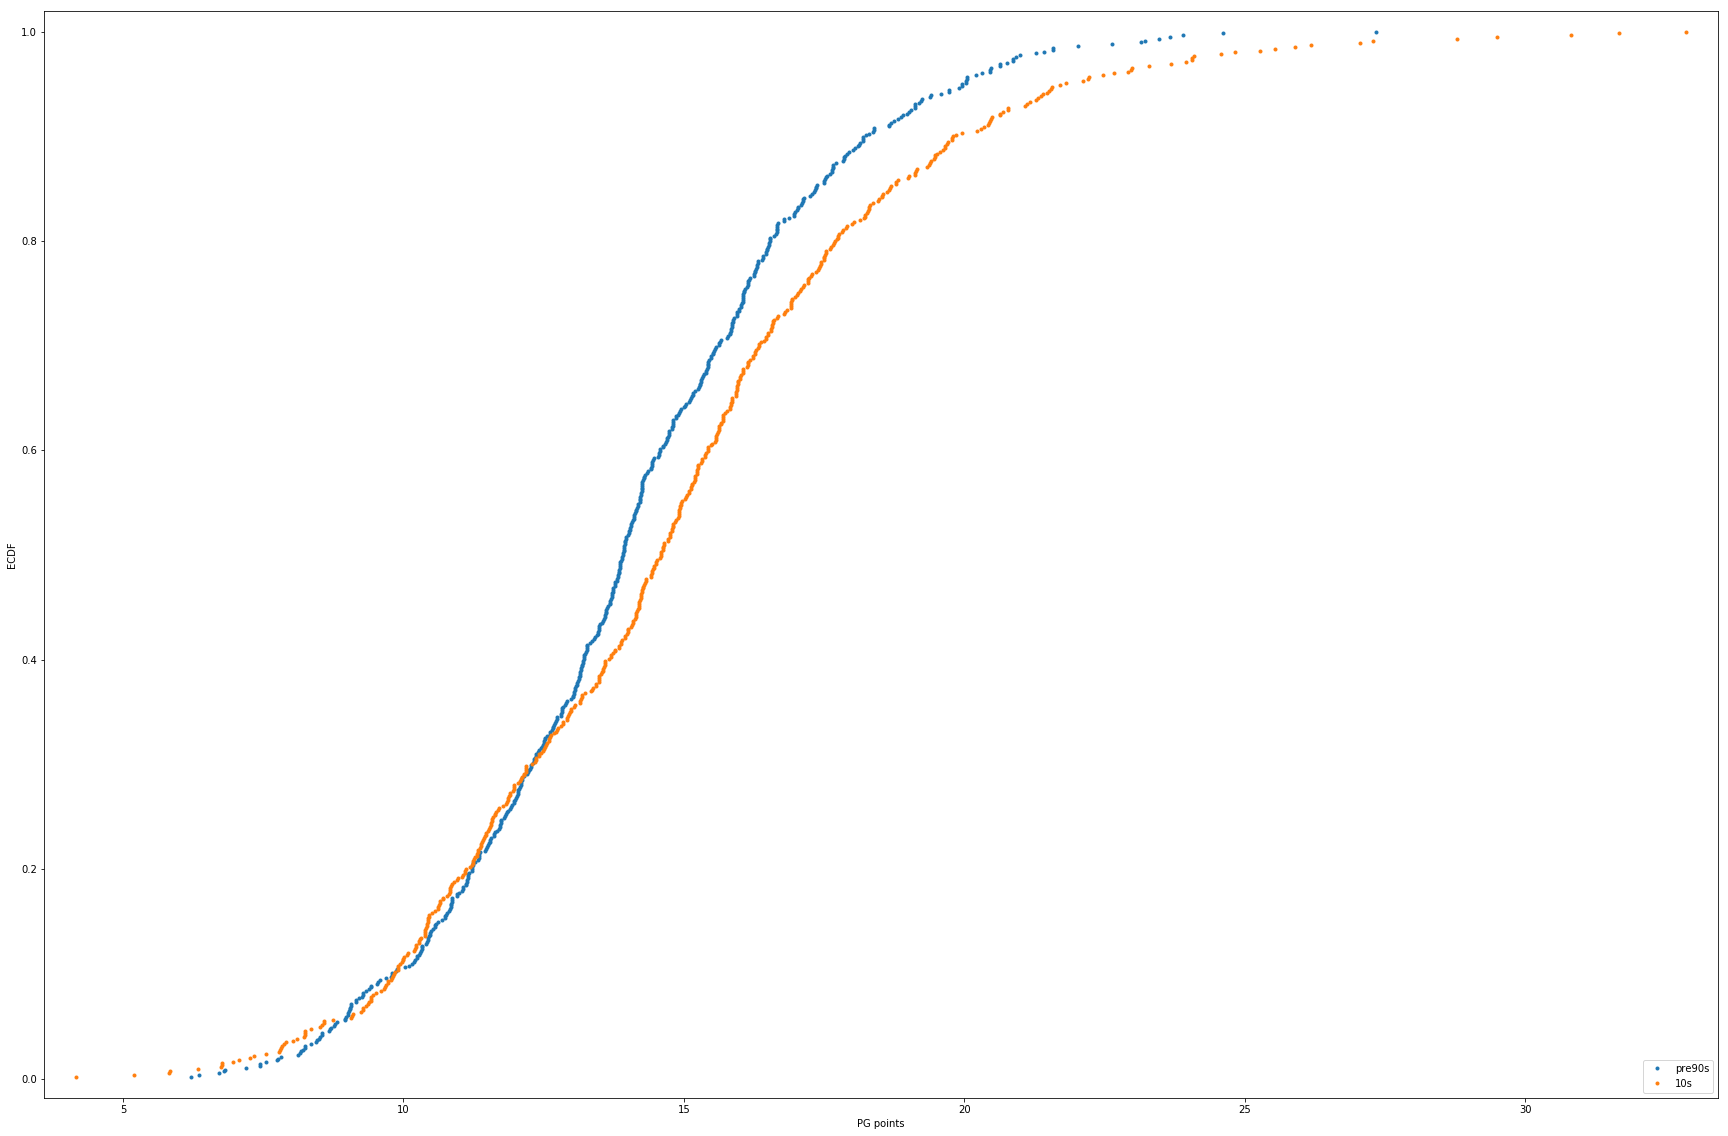

In [11]:
# Compute ECDFs
x_pg_pre90s, y_pg_pre90s = ecdf(pg_pre90s['PTS'])
x_pg_10s, y_pg_10s = ecdf(pg_10s['PTS'])

plt.figure(figsize=(30,20))

# Plot the ECDFs
_ = plt.plot(x_pg_pre90s, y_pg_pre90s, marker='.', linestyle='none')
_ = plt.plot(x_pg_10s, y_pg_10s, marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# Add axis labels and legend
_ = plt.xlabel('PG points')
_ = plt.ylabel('ECDF')
_ = plt.legend(('pre90s', '10s'), loc='lower right')

# Show the plot
plt.show()

In [12]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    # Store the replicate in the appropriate index of bs_replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [13]:
mean_diff = np.mean(pg_10s['PTS']) - np.mean(pg_pre90s['PTS'])

# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((pg_pre90s['PTS'], pg_10s['PTS'])))

# Shift the samples
pg_pre90s_shifted = pg_pre90s['PTS'] - np.mean(pg_pre90s['PTS']) + combined_mean
pg_10s_shifted = pg_10s['PTS'] - np.mean(pg_10s['PTS']) + combined_mean

# Get bootstrap replicates of shifted data sets
pg_replicates_pre90s = draw_bs_reps(pg_pre90s_shifted, np.mean, 10000)
pg_replicates_10s = draw_bs_reps(pg_10s_shifted, np.mean, 10000)

# Compute replicates of difference of means: bs_diff_replicates
pg_diff_replicates = pg_replicates_10s - pg_replicates_pre90s

# Compute the p-value: p
p = np.sum(pg_diff_replicates >= mean_diff) / len(pg_diff_replicates)

# Print p-value
print('p =', p)

p = 0.001
